https://github.com/mubaris/studious-eureka

In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.svm import SVC

plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

## Linear svm

In [4]:
# Import Dataset
data = pd.read_csv('data/data.csv', header=None)
print(data.head())

X = data.values[:, :2]  
y = data.values[:, 2] # 0 or 1

    0    1  2
0  18  204  0
1   2  192  0
2   0  172  0
3 -29  165  0
4 -18  180  0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

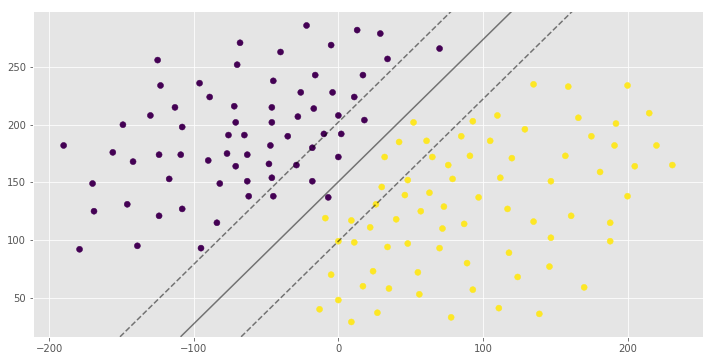

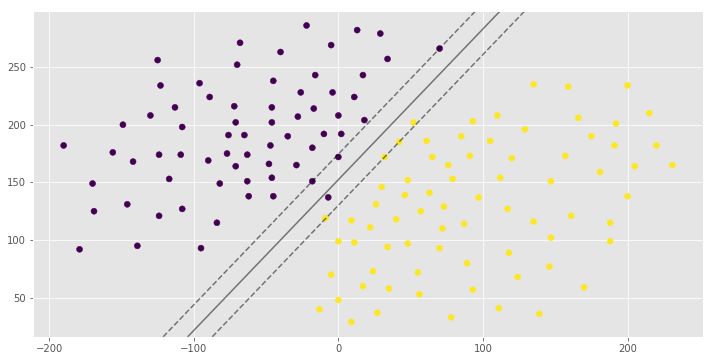

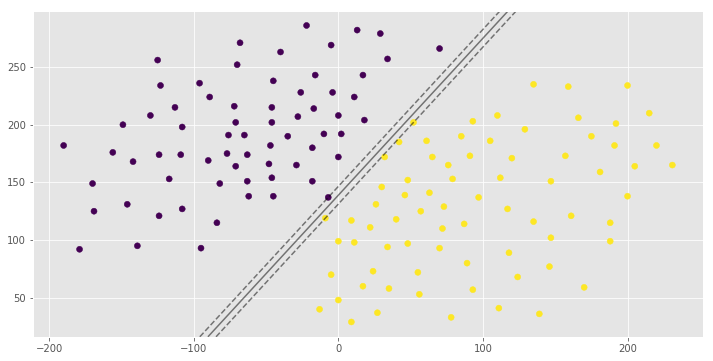

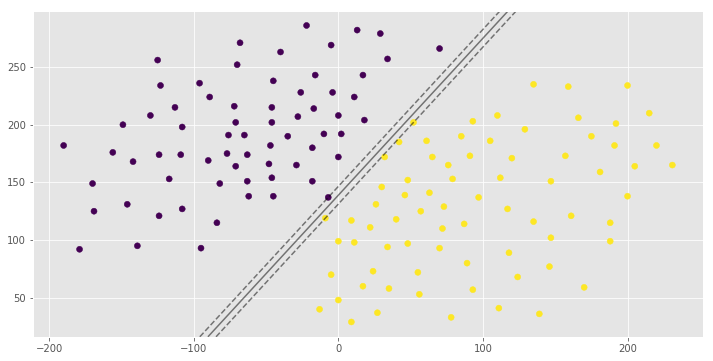

In [7]:
# A function to draw hyperplane and the margin of SVM classifier
def draw_svm(X, y, C=1.0):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)
    
    # The SVM Model with given C parameter
    clf = SVC(kernel='linear', C=C) 
    
    # 목적함수에 추가되는 term : C*sum(슬랙변수) 
    # C가 커질 수록 슬랙변수(잘못 분류한 정도)의 합을 많이 고려한다는 것으로 패널티를 많이 준다
    # 즉, decision boundary를 넘어가는 값들에는 패널티 -> 마진이 점점 작아짐
    
    clf_fit = clf.fit(X, y)
    
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(X, y, 0.0001))
clf_arr.append(draw_svm(X, y, 0.001))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))

In [4]:
for i, clf in enumerate(clf_arr):
    C=[0.0001, 0.001, 1, 10]
    # Accuracy Score
    print("C=",C[i],", Accuracy:",clf.score(X, y))
    pred = clf.predict([(12, 32), (-250, 32), (120, 43)])
    print("pred:",pred)
    print("-"*50)

C= 0.0001 , Accuracy: 0.9929078014184397
pred: [1 0 1]
--------------------------------------------------
C= 0.001 , Accuracy: 0.9929078014184397
pred: [1 0 1]
--------------------------------------------------
C= 1 , Accuracy: 1.0
pred: [1 0 1]
--------------------------------------------------
C= 10 , Accuracy: 1.0
pred: [1 0 1]
--------------------------------------------------


## Polynomial kernel svm

In [6]:
data = pd.read_csv('data/polydata2.csv', header=None)
X = data.values[:, :2]
y = data.values[:, 2]
data

,0,1,2
0,-167,-60,0
1,-155,-84,0
2,-119,-119,0
3,-137,-100,0
4,-99,-133,0
5,-60,-141,0
6,-34,-131,0
7,-2,-107,0
8,16,-72,0
9,36,-17,0


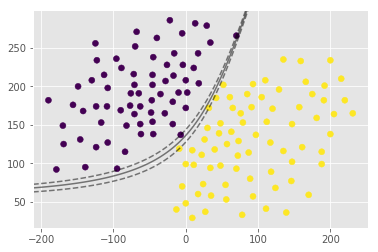

In [5]:
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', C=C, gamma=gamma) # gamma 'auto'=1/n_features / degree default = 3
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf = draw_svm(X, y)
# C랑 gamma 값 바꿔가면서 해봤는데 데이터가 너무 잘 나뉜 데이터라 별 변화없다score = clf.score(X, y)

In [6]:
score = clf.score(X, y)
pred = clf.predict([(-130, 110), (-170, -160), (80, 90), (-280, 20)])
print("accuracy:",score)
print("pred:",pred)

accuracy: 1.0
pred: [0 0 1 1]


## RBF kernel svm

In [7]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_gaussian_quantiles

#### 예제 1)

In [8]:
X, y = make_moons(n_samples=200)
print(X[:5])

[[ 0.21394691 -0.11815899]
 [ 0.80527026  0.59290793]
 [ 0.5         0.8660254 ]
 [ 1.58005691 -0.31457595]
 [ 0.55392006  0.83256985]]


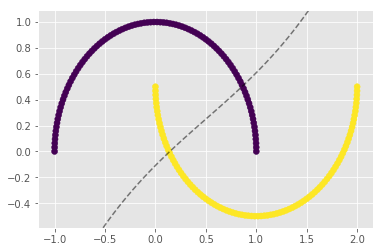

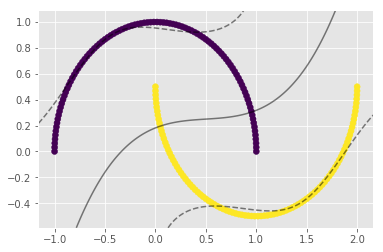

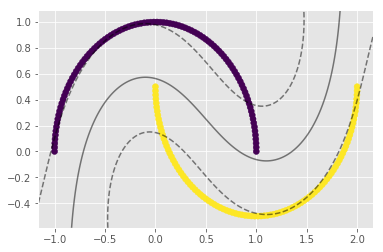

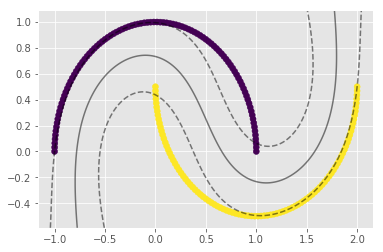

In [9]:
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))
# C가 커질수록 잘 분류되었다

In [10]:
for i, clf in enumerate(clf_arr):
    C=[0.01,0.1,1,10]

    print("C=",C[i])
    print("Accuracy:",clf.score(X, y))
    print('-'*50)

C= 0.01
Accuracy: 0.83
--------------------------------------------------
C= 0.1
Accuracy: 0.9
--------------------------------------------------
C= 1
Accuracy: 1.0
--------------------------------------------------
C= 10
Accuracy: 1.0
--------------------------------------------------


##### 예제 2)

In [11]:
X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, cov=3)

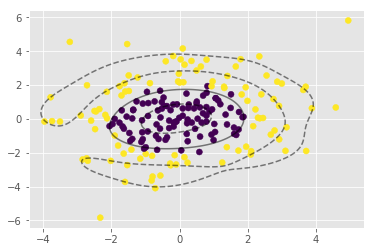

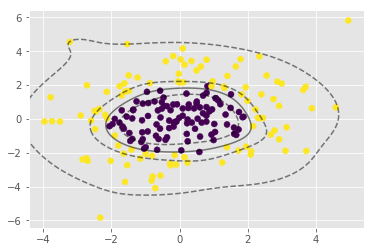

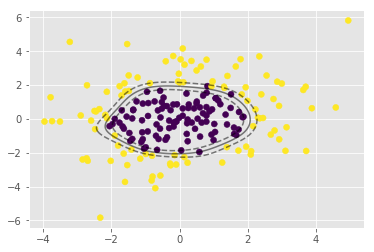

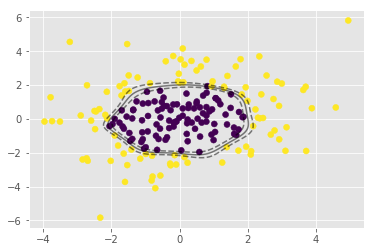

In [15]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

clf_arr = []
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))
clf_arr.append(draw_svm(X, y, 100))

In [16]:
for i, clf in enumerate(clf_arr):
    C=[0.1,1,10,100]

    print("C=",C[i])
    print("Accuracy:",clf.score(X, y))
    print('-'*50)

C= 0.1
Accuracy: 0.945
--------------------------------------------------
C= 1
Accuracy: 0.975
--------------------------------------------------
C= 10
Accuracy: 0.98
--------------------------------------------------
C= 100
Accuracy: 0.995
--------------------------------------------------


http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html